# listings.csv - data from centris.ca

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
listings = pd.read_csv("listings.csv")

## Overview

In [3]:
listings.head()

,__type,MlsNumber,CategoryCode,Lat,Lng,Address,City,Quartier,ShortCity,PostalCode,...,IsFavoriteDisplayed,IsRemovedDisplayed,IsNewPrice,IsNew,PageTitle,IsEmptyView,Langue,GoogleMapAddressLink,IsMissingView,IsInFavorite
0,Centris.CentrisCA.Domain.Views.PropertyView,9027411,COP,45.556508,-73.633198,"8708, Av. André-Grasset, apt. 202",Ahuntsic-Cartierville (Montréal),Ahuntsic Central,Ahuntsic-Cartierville (Montréal),H2M 2L4,...,True,True,False,False,Condos for sale in Ahuntsic-Cartierville (Mont...,False,NaN,"https://maps.google.ca/maps?z=17&q=45.556508,-...",False,False
1,Centris.CentrisCA.Domain.Views.PropertyView,9030205,PPR,45.542062,-73.696868,"12064 - 12066, Rue Valmont",Ahuntsic-Cartierville (Montréal),Nouveau Bordeaux,Ahuntsic-Cartierville (Montréal),H3M 2V5,...,True,True,False,False,Duplexes for sale in Ahuntsic-Cartierville (Mo...,False,NaN,"https://maps.google.ca/maps?z=17&q=45.542062,-...",False,False
2,Centris.CentrisCA.Domain.Views.PropertyView,9041238,PCI,45.573887,-73.649079,"2326 - 2328, Rue Fleury E.",Ahuntsic-Cartierville (Montréal),Ahuntsic East,Ahuntsic-Cartierville (Montréal),H2B 1K9,...,True,True,False,False,Commercial building for sale in Ahuntsic-Carti...,False,NaN,https://maps.google.ca/maps?z=17&q=45.57388725...,False,False
3,Centris.CentrisCA.Domain.Views.PropertyView,9048590,PPR,45.571040,-73.643413,"2283 - 2287, Rue Sauvé E.",Ahuntsic-Cartierville (Montréal),Ahuntsic East,Ahuntsic-Cartierville (Montréal),H2B 1B4,...,True,True,False,False,Triplexes for sale in Ahuntsic-Cartierville (M...,False,NaN,https://maps.google.ca/maps?z=17&q=45.57104035...,False,False
4,Centris.CentrisCA.Domain.Views.PropertyView,9066959,COP,45.533876,-73.672649,"2110, Rue Caroline-Béique, apt. 804",Ahuntsic-Cartierville (Montréal),Nouveau Bordeaux,Ahuntsic-Cartierville (Montréal),H4N 3K2,...,True,True,False,False,Condos for sale in Ahuntsic-Cartierville (Mont...,False,NaN,"https://maps.google.ca/maps?z=17&q=45.533876,-...",False,False


In [4]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14667 entries, 0 to 14666
Data columns (total 65 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   __type                14667 non-null  object 
 1   MlsNumber             14667 non-null  int64  
 2   CategoryCode          14667 non-null  object 
 3   Lat                   14667 non-null  float64
 4   Lng                   14667 non-null  float64
 5   Address               14667 non-null  object 
 6   City                  14667 non-null  object 
 7   Quartier              11488 non-null  object 
 8   ShortCity             14667 non-null  object 
 9   PostalCode            14667 non-null  object 
 10  ShortDescription      0 non-null      float64
 11  LongDescription       12922 non-null  object 
 12  PhotoText             14667 non-null  object 
 13  BuyPrice              14667 non-null  object 
 14  BuyPriceDesc          2811 non-null   object 
 15  LocationPrice      

## First transformations

### Remove columns without non-null values

In [5]:
just_nulls = ["ShortDescription", "Langue"]
df = listings.drop(just_nulls, axis=1)

### Dropping columns containing URLs

In [6]:
url_cols = [colname for colname in df.columns if colname.endswith("Url")]
url_cols.append("GoogleMapAddressLink")
len(url_cols)

13

In [7]:
df = df.drop(url_cols, axis=1)

### Converting prices to numerical values

In [8]:
df["BuyPrice"].dropna()

0          $187,500
1          $574,900
2          $475,000
3          $545,000
4          $200,000
            ...    
14662      $760,000
14663    $1,295,000
14664    $1,450,000
14665    $2,268,000
14666    $1,950,000
Name: BuyPrice, Length: 14667, dtype: object

In [9]:
df["LocationPrice"].dropna()

45       $2,500
105      $1,100
118      $1,450
493      $1,200
531        $950
          ...  
14569    $2,350
14577    $6,500
14614    $5,000
14617    $5,900
14642    $3,250
Name: LocationPrice, Length: 259, dtype: object

In [10]:
def convert_price_to_num(price: str) -> float:
    """
    Example input: "$1,234,567.89"
    Example output: 1234567.99
    """
    # handle nan values
    if price != price:
        return price
    # remove the dollar sign
    price = price[1:]
    # remove commas
    price = price.replace(",", "")

    return float(price)


In [11]:
df[["BuyPrice", "LocationPrice"]] = df[["BuyPrice", "LocationPrice"]].applymap(convert_price_to_num)

In [12]:
df[["BuyPrice", "LocationPrice"]].head()

,BuyPrice,LocationPrice
0,187500.0,NaN
1,574900.0,NaN
2,475000.0,NaN
3,545000.0,NaN
4,200000.0,NaN


In [13]:
df[["BuyPrice", "LocationPrice"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14667 entries, 0 to 14666
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   BuyPrice       14667 non-null  float64
 1   LocationPrice  259 non-null    float64
dtypes: float64(2)
memory usage: 229.3 KB


### BuyPriceDesc & LocationPriceDesc

In [14]:
df['BuyPriceDesc'].value_counts()

 +GST/QST                 2791
 /square foot +GST/QST      17
 /square foot                3
Name: BuyPriceDesc, dtype: int64

In [15]:
df['LocationPriceDesc'].value_counts()

 /month                         244
 /month +GST/QST                 11
 /year /square foot +GST/QST      2
 /year +GST/QST                   1
 /year                            1
Name: LocationPriceDesc, dtype: int64

#### Almost all listings on centris.ca in Montreal have their area specified in square foot, so this information here is probably redundant

In [16]:
df.loc[df['BuyPriceDesc'] == ' /square foot', 'BuyPriceDesc'] = np.nan
df.loc[df['BuyPriceDesc'] == ' /square foot +GST/QST', 'BuyPriceDesc'] = " +GST/QST"
df.loc[df['LocationPriceDesc'] == ' /year /square foot +GST/QST', 'LocationPriceDesc'] = ' /year +GST/QST'

#### Changing all prices in LocationPrice to be /month

In [17]:
prices_per_year = (df['LocationPriceDesc'] == ' /year') | (df['LocationPriceDesc'] == ' /year +GST/QST')
df.loc[prices_per_year, 'LocationPrice'] = df.loc[prices_per_year, 'LocationPrice'] / 12

In [18]:
df.loc[df['LocationPriceDesc'] == ' /year', 'LocationPriceDesc'] = np.nan
df.loc[df['LocationPriceDesc'] == ' /year +GST/QST', 'LocationPriceDesc'] = ' +GST/QST'
df.loc[df['LocationPriceDesc'] == ' /month', 'LocationPriceDesc'] = np.nan
df.loc[df['LocationPriceDesc'] == ' /month +GST/QST', 'LocationPriceDesc'] = ' +GST/QST'

In [19]:
df['BuyPriceDesc'].value_counts()

 +GST/QST    2808
Name: BuyPriceDesc, dtype: int64

In [20]:
df['LocationPriceDesc'].value_counts()

 +GST/QST    14
Name: LocationPriceDesc, dtype: int64

#### Change BuyPriceDesc & LocationPriceDesc to logical variables

In [21]:
df[['BuyPriceDesc', 'LocationPriceDesc']] = df[['BuyPriceDesc', 'LocationPriceDesc']].applymap(lambda x: x == ' +GST/QST')
df = df.rename(columns={'BuyPriceDesc': 'BuyPriceGSTQST', 'LocationPriceDesc': 'LocationPriceGSTQST'})

In [22]:
df['BuyPriceGSTQST'].value_counts()

False    11859
True      2808
Name: BuyPriceGSTQST, dtype: int64

In [23]:
df['LocationPriceGSTQST'].value_counts()

False    14653
True        14
Name: LocationPriceGSTQST, dtype: int64

## Inspecting columns that have missing data

#### Quartier (78% non-null)

In [24]:
df["Quartier"].value_counts()

Central                           1244
Central West                       831
Le Plateau-Mont-Royal              735
Mercier                            591
Rivière-des-Prairies               504
Hochelaga-Maisonneuve              499
Île-des-Soeurs                     442
Rosemont                           431
Saint-Henri/Petite Bourgogne       428
Pointe-aux-Trembles                416
Côte-des-Neiges                    400
Villeray                           342
East                               336
Notre-Dame-de-Grâce                336
Saint-Michel                       302
La Petite-Patrie                   299
Old Montréal                       251
Verdun                             235
Saint-Paul/Émard                   228
Nouveau Bordeaux                   192
Pierrefonds/Central East           176
L'Île-Bizard                       163
Pointe-Saint-Charles               160
West                               146
Ahuntsic West                      143
Mile-End                 

#### LongDescription (88% non-null)

In [25]:
df["LongDescription"].head()

0    PRIX POUR VENTE RAPIDE. Superbe condo ensoleil...
1    Duplex à vendre à Ahuntsic près de la rivière,...
2    rare sur le marché! ideal pour dentiste ou med...
3    Excellent opportunity for builder/ contractor....
4    Beautiful condo built in 2011 still under guar...
Name: LongDescription, dtype: object

#### Construction (83% non-null)

In [26]:
df["Construction"].value_counts()

Construction 2013    474
Construction 2012    472
Construction 2011    357
Construction 2014    328
Construction 1910    324
                    ... 
Construction 1868      1
Construction 1815      1
Construction 1823      1
Construction 1828      1
Construction 1830      1
Name: Construction, Length: 160, dtype: int64

##### Transform it to a numerical column

In [27]:
df[["Construction"]] = df[["Construction"]].applymap(lambda x: np.nan if x != x else int(x[13:]))

In [28]:
df["Construction"].value_counts()

2013.0    474
2012.0    472
2011.0    357
2014.0    328
1910.0    324
         ... 
1864.0      1
1869.0      1
1894.0      1
1867.0      1
1820.0      1
Name: Construction, Length: 160, dtype: int64

#### OpenHouse (6% non-null)

"An open house is a scheduled period of time in which a home is available for viewing by potential buyers. Open houses can attract interested buyers and lead to an offer or alert the realtor to issues with the space that might be pointed out."

In [29]:
df["OpenHouse"].value_counts()  # moze przerobic na wartosc logiczna?

Open house: 11/09/2014, 2 PM - 4 PM           632
Open house: 11/09/2014, 1 PM - 5 PM            73
Open house: 11/09/2014, 1 PM - 4 PM            65
Open house: 11/16/2014, 2 PM - 4 PM            26
Open house: 11/09/2014, 3 PM - 4 PM            19
Open house: 11/09/2014, 12 PM - 5 PM           14
Open house: 11/09/2014, 1:30 PM - 2:30 PM      13
Open house: 11/09/2014, 11 AM - 4 PM           10
Open house: 11/09/2014, 1 PM - 3 PM             3
Open house: 11/09/2014, 2 PM - 3 PM             2
Open house: 11/09/2014, 2 PM - 5 PM             2
Open house: 11/16/2014, 1 PM - 4 PM             2
Open house: 11/09/2014, 12:30 PM - 1:30 PM      1
Open house: 11/16/2014, 12 PM - 1 PM            1
Open house: 11/09/2014, 2 PM - 4:30 PM          1
Open house: 11/09/2014, 1:30 PM - 4 PM          1
Open house: 11/09/2014, 4:30 PM - 5:30 PM       1
Open house: 11/09/2014, 2:30 PM - 4 PM          1
Open house: 11/22/2014, 2 PM - 4 PM             1
Open house: 11/30/2014, 2 PM - 4 PM             1


#### Utilisation (23% non-null)

In [30]:
df["Utilisation"].value_counts()

Residential only                     2299
Commercial only                       392
Residential and commercial            255
Commercial and office space           139
Commercial and residential            124
Commercial and industrial              22
Industrial and offices                 19
Industrial only                        15
Offices only                           14
Other                                  14
Multi-family dwelling                   5
Commercial or industrial (income)       4
Retirement home                         4
Name: Utilisation, dtype: int64

## Inscpecting some columns with values of an object type

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14667 entries, 0 to 14666
Data columns (total 50 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   __type               14667 non-null  object 
 1   MlsNumber            14667 non-null  int64  
 2   CategoryCode         14667 non-null  object 
 3   Lat                  14667 non-null  float64
 4   Lng                  14667 non-null  float64
 5   Address              14667 non-null  object 
 6   City                 14667 non-null  object 
 7   Quartier             11488 non-null  object 
 8   ShortCity            14667 non-null  object 
 9   PostalCode           14667 non-null  object 
 10  LongDescription      12922 non-null  object 
 11  PhotoText            14667 non-null  object 
 12  BuyPrice             14667 non-null  float64
 13  BuyPriceGSTQST       14667 non-null  bool   
 14  LocationPrice        259 non-null    float64
 15  LocationPriceGSTQST  14667 non-null 

### __type

In [32]:
df['__type'].value_counts()

Centris.CentrisCA.Domain.Views.PropertyView    14667
Name: __type, dtype: int64

Can be dropped

In [33]:
df = df.drop(['__type'], axis=1)

### Category

In [34]:
df['Category'].value_counts()

Condo/Loft, Apartment, Detached                3338
Condo/Loft, Apartment, Attached                2255
Condo/Loft, Apartment, Semi-detached           1385
Single Family, Two or more storey, Detached    1344
Single Family, Bungalow, Detached               647
                                               ... 
Lot, 5,750 sqft                                   1
Revenue Property, Semi-detached, 14 Plex          1
Revenue Property, Attached, 26 UNITS              1
Lot, 3,832 sqft                                   1
Lot, 11,781 sqft                                  1
Name: Category, Length: 408, dtype: int64

### CategoryCode & CatgCode

In [35]:
df['CategoryCode'].value_counts()

COP    7698
UNI    3522
PPR    2587
PCI     719
TER     140
FER       1
Name: CategoryCode, dtype: int64

In [36]:
df['CatgCode'].value_counts()

COP    7698
UNI    3522
PPR    2587
PCI     719
TER     140
FER       1
Name: CatgCode, dtype: int64

#### CategoryCode and CatgCode are identical - one of them can be dropped

In [37]:
np.sum(df['CategoryCode'] != df['CatgCode'])

0

In [38]:
df = df.drop(['CatgCode'], axis=1)

### City & ShortCity

In [39]:
df['City'].value_counts()

Ville-Marie (Montréal)                                 2087
Mercier/Hochelaga-Maisonneuve (Montréal)               1124
Rivière-des-Prairies/Pointe-aux-Trembles (Montréal)     920
Le Plateau-Mont-Royal (Montréal)                        871
Le Sud-Ouest (Montréal)                                 816
Côte-des-Neiges/Notre-Dame-de-Grâce (Montréal)          736
Rosemont/La Petite-Patrie (Montréal)                    730
Villeray/Saint-Michel/Parc-Extension (Montréal)         729
Saint-Laurent (Montréal)                                704
Ahuntsic-Cartierville (Montréal)                        696
Verdun/Île-des-Soeurs (Montréal)                        677
Pierrefonds-Roxboro (Montréal)                          511
LaSalle (Montréal)                                      470
Montréal-Nord (Montréal)                                433
Lachine (Montréal)                                      361
Dollard-Des Ormeaux                                     333
Côte-Saint-Luc                          

In [40]:
df['ShortCity'].value_counts()

Ville-Marie (Montréal)                      2087
Mercier/Hochelaga-Maisonneuve (Montréal)    1124
Rivière-des-Prairies/Pointe-aux-Tre ...      920
Le Plateau-Mont-Royal (Montréal)             871
Le Sud-Ouest (Montréal)                      816
Côte-des-Neiges/Notre-Dame-de-Grâce ...      736
Rosemont/La Petite-Patrie (Montréal)         730
Villeray/Saint-Michel/Parc-Extensio ...      729
Saint-Laurent (Montréal)                     704
Ahuntsic-Cartierville (Montréal)             696
Verdun/Île-des-Soeurs (Montréal)             677
Pierrefonds-Roxboro (Montréal)               511
LaSalle (Montréal)                           470
Montréal-Nord (Montréal)                     433
Lachine (Montréal)                           361
Dollard-Des Ormeaux                          333
Côte-Saint-Luc                               278
Anjou (Montréal)                             256
Saint-Léonard (Montréal)                     248
Westmount                                    236
L'Île-Bizard/Sainte-

#### City and ShortCity have very similar values

In [41]:
df.loc[df['City'] != df['ShortCity'], ['ShortCity', 'City']].sample(n=20)

,ShortCity,City
14024,Villeray/Saint-Michel/Parc-Extensio ...,Villeray/Saint-Michel/Parc-Extension (Montréal)
14194,Villeray/Saint-Michel/Parc-Extensio ...,Villeray/Saint-Michel/Parc-Extension (Montréal)
9109,Rivière-des-Prairies/Pointe-aux-Tre ...,Rivière-des-Prairies/Pointe-aux-Trembles (Mont...
1388,Côte-des-Neiges/Notre-Dame-de-Grâce ...,Côte-des-Neiges/Notre-Dame-de-Grâce (Montréal)
14324,Villeray/Saint-Michel/Parc-Extensio ...,Villeray/Saint-Michel/Parc-Extension (Montréal)
14218,Villeray/Saint-Michel/Parc-Extensio ...,Villeray/Saint-Michel/Parc-Extension (Montréal)
8492,Rivière-des-Prairies/Pointe-aux-Tre ...,Rivière-des-Prairies/Pointe-aux-Trembles (Mont...
14362,Villeray/Saint-Michel/Parc-Extensio ...,Villeray/Saint-Michel/Parc-Extension (Montréal)
9088,Rivière-des-Prairies/Pointe-aux-Tre ...,Rivière-des-Prairies/Pointe-aux-Trembles (Mont...
13733,Villeray/Saint-Michel/Parc-Extensio ...,Villeray/Saint-Michel/Parc-Extension (Montréal)


#### ShortCity can probably be dropped

In [42]:
df = df.drop(['ShortCity'], axis=1)

### PhotoText & PageTitle

In [43]:
df[['PhotoText']]

,PhotoText
0,Condos for sale in Ahuntsic-Cartierville (Mont...
1,Duplexes for sale in Ahuntsic-Cartierville (Mo...
2,Commercial building for sale in Ahuntsic-Carti...
3,Triplexes for sale in Ahuntsic-Cartierville (M...
4,Condos for sale in Ahuntsic-Cartierville (Mont...
...,...
14662,"Condos for sale in Westmount, Montréal (Island..."
14663,"Houses for sale in Westmount, Montréal (Island..."
14664,"Condos for sale in Westmount, Montréal (Island..."
14665,"Houses for sale in Westmount, Montréal (Island..."


In [44]:
df[['PageTitle']]

,PageTitle
0,Condos for sale in Ahuntsic-Cartierville (Mont...
1,Duplexes for sale in Ahuntsic-Cartierville (Mo...
2,Commercial building for sale in Ahuntsic-Carti...
3,Triplexes for sale in Ahuntsic-Cartierville (M...
4,Condos for sale in Ahuntsic-Cartierville (Mont...
...,...
14662,"Condos for sale in Westmount, Montréal (Island..."
14663,"Houses for sale in Westmount, Montréal (Island..."
14664,"Condos for sale in Westmount, Montréal (Island..."
14665,"Houses for sale in Westmount, Montréal (Island..."


#### Same case as with CategoryCode & CatgCode

In [45]:
np.sum(df['PhotoText'] != df['PageTitle'])

0

In [46]:
df = df.drop(['PhotoText'], axis=1)

### GenreCode

In [47]:
df['GenreCode'].value_counts()

AP     7385
ME     2362
2X     1190
PP      797
3X      649
VE      389
AU      386
MPM     325
C       285
4X      236
MA      185
LS      128
5X      126
TR      123
I        45
MEM      27
TE       17
MM       11
FE        1
Name: GenreCode, dtype: int64

## Columns wtih boolean values

In [48]:
df['IsNewPrice'].value_counts()

False    14638
True        29
Name: IsNewPrice, dtype: int64

In [49]:
df['IsNew'].value_counts()

False    14621
True        46
Name: IsNew, dtype: int64

### Other columns are reduntant:

In [50]:
df['IsFavorite'].value_counts()

False    14667
Name: IsFavorite, dtype: int64

In [51]:
df['IsRemoved'].value_counts()

False    14667
Name: IsRemoved, dtype: int64

In [52]:
df['IsSubject'].value_counts()

False    14667
Name: IsSubject, dtype: int64

In [53]:
df['IsStrictQueryMatch'].value_counts()

False    14667
Name: IsStrictQueryMatch, dtype: int64

In [54]:
df['IsFavoriteDisplayed'].value_counts()

True    14667
Name: IsFavoriteDisplayed, dtype: int64

In [55]:
df['IsRemovedDisplayed'].value_counts()

True    14667
Name: IsRemovedDisplayed, dtype: int64

In [56]:
df['IsEmptyView'].value_counts()

False    14667
Name: IsEmptyView, dtype: int64

In [57]:
df['IsMissingView'].value_counts()

False    14667
Name: IsMissingView, dtype: int64

In [58]:
df['IsInFavorite'].value_counts()

False    14667
Name: IsInFavorite, dtype: int64

In [59]:
df = df.drop(['IsFavorite', 'IsRemoved', 'IsSubject', 
        'IsStrictQueryMatch', 'IsFavoriteDisplayed', 'IsRemovedDisplayed', 
        'IsEmptyView', 'IsMissingView', 'IsInFavorite'], axis=1)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14667 entries, 0 to 14666
Data columns (total 37 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   MlsNumber            14667 non-null  int64  
 1   CategoryCode         14667 non-null  object 
 2   Lat                  14667 non-null  float64
 3   Lng                  14667 non-null  float64
 4   Address              14667 non-null  object 
 5   City                 14667 non-null  object 
 6   Quartier             11488 non-null  object 
 7   PostalCode           14667 non-null  object 
 8   LongDescription      12922 non-null  object 
 9   BuyPrice             14667 non-null  float64
 10  BuyPriceGSTQST       14667 non-null  bool   
 11  LocationPrice        259 non-null    float64
 12  LocationPriceGSTQST  14667 non-null  bool   
 13  Category             14667 non-null  object 
 14  Construction         12237 non-null  float64
 15  OpenHouse            875 non-null   

## Numerical columns

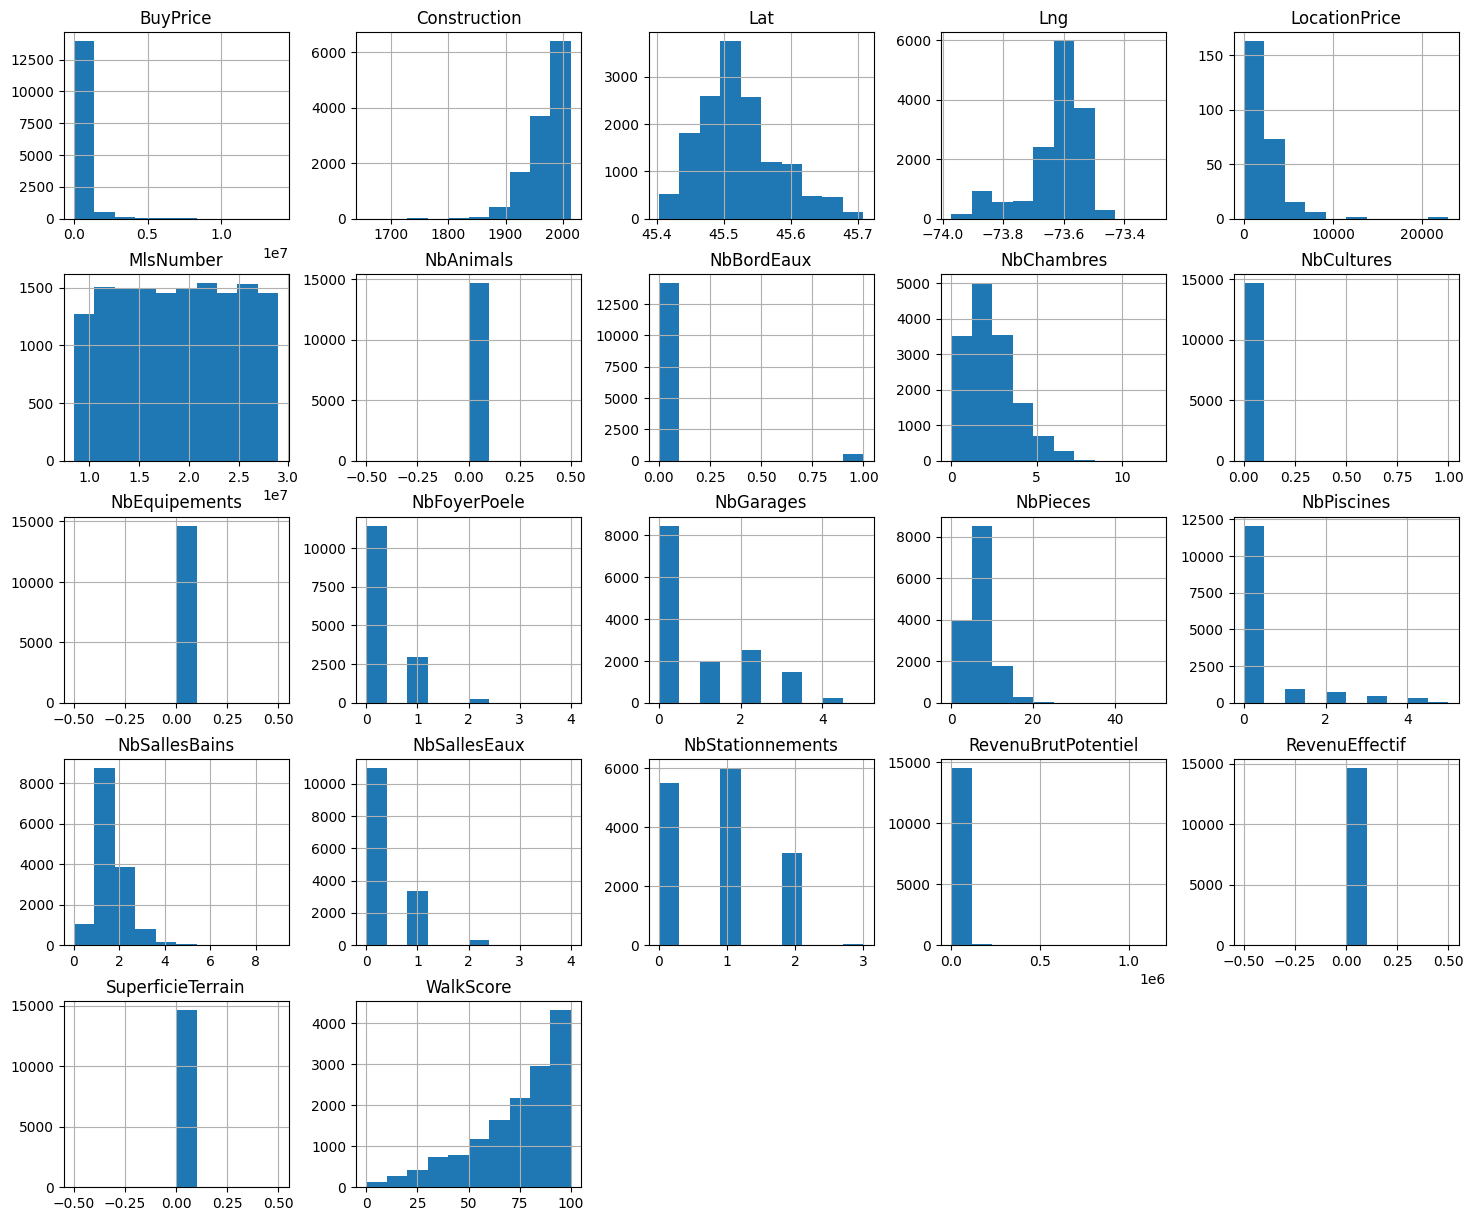

In [61]:
df.select_dtypes(['int64', 'float64']).hist(figsize=(18, 15))
plt.show()

### NbAnimals, NbEquipements, RevenuEffectif & SuperficieTerrain contain only zeros and therefore can be dropped

In [62]:
df['NbAnimals'].value_counts()

0    14667
Name: NbAnimals, dtype: int64

In [63]:
df['NbEquipements'].value_counts()

0    14667
Name: NbEquipements, dtype: int64

In [64]:
df['RevenuEffectif'].value_counts()

0    14667
Name: RevenuEffectif, dtype: int64

In [65]:
df['SuperficieTerrain'].value_counts()

0    14667
Name: SuperficieTerrain, dtype: int64

In [66]:
df = df.drop(['NbAnimals', 'NbEquipements', 'RevenuEffectif', 'SuperficieTerrain'], axis=1)

### NbCultures contains almost only zeros - there is one exception:

In [67]:
df['NbCultures'].value_counts()

0    14666
1        1
Name: NbCultures, dtype: int64

In [68]:
df[df['NbCultures'] == 1]

,MlsNumber,CategoryCode,Lat,Lng,Address,City,Quartier,PostalCode,LongDescription,BuyPrice,...,NbSallesBains,NbFoyerPoele,NbGarages,NbStationnements,NbPiscines,NbBordEaux,NbCultures,IsNewPrice,IsNew,PageTitle
10910,8683066,FER,45.441254,-73.950284,"39, Av. Phillips",Senneville,NaN,H9X 3X5,"""URBAN CERTIFIED ORGANIC FARM"" One of a kind o...",4300000.0,...,2,1,4,2,0,0,1,False,False,"Farms for sale in Senneville, Montréal (Island..."


### Correlation matrix

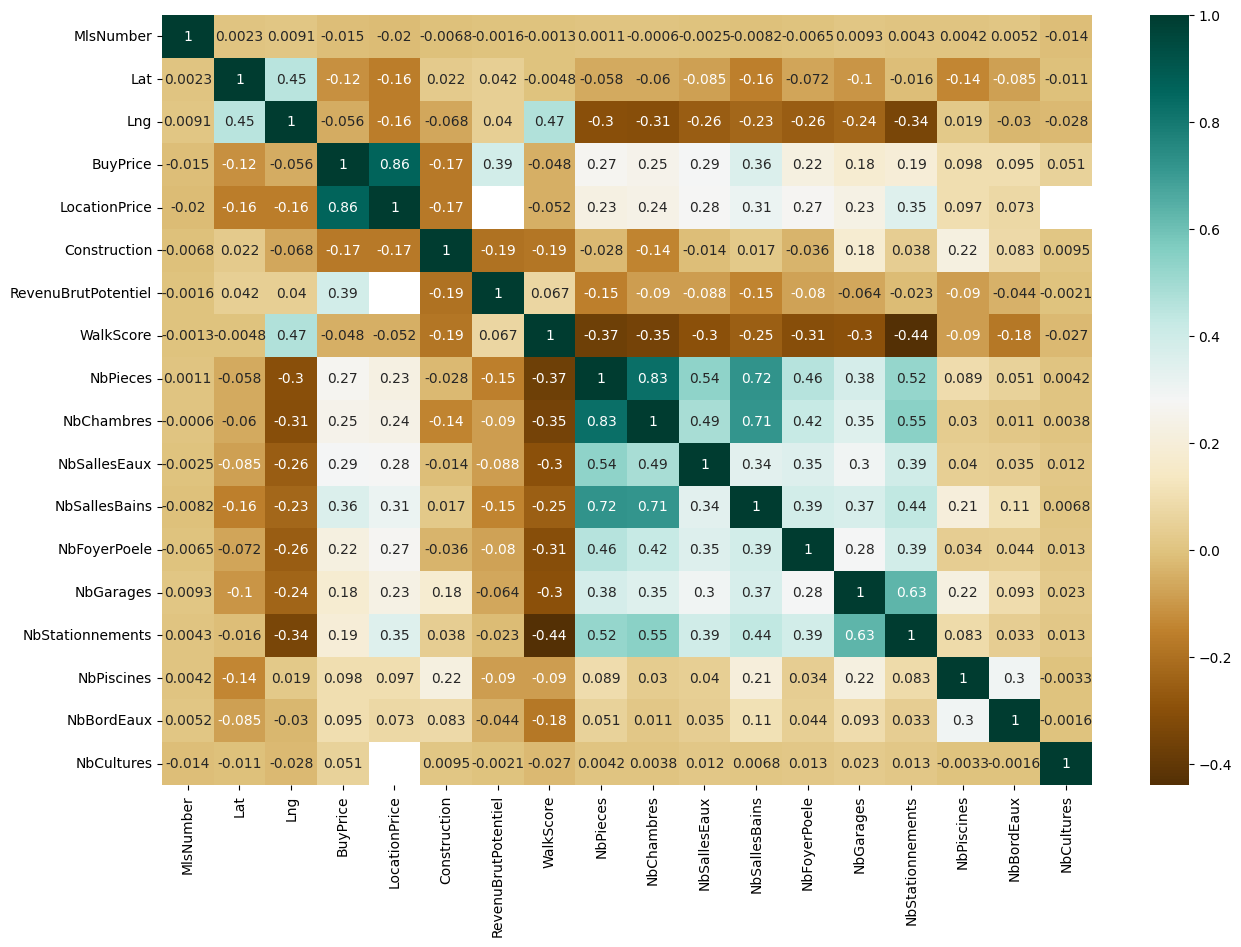

In [69]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.select_dtypes(['int64', 'float64']).corr(), annot=True, cmap="BrBG")
plt.show()